In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error



In [2]:
#reading Movie_set
Movies_data = pd.read_csv("C:/Users/gupta/OneDrive/Desktop/Datasets/IMDb-MoviesIndia.csv", encoding='latin1')


In [3]:
Movies_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
Movies_data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [6]:
Movies_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
Movies_data.shape

(15509, 10)

In [8]:
Movies_data.dropna(axis=0, inplace=True)

In [9]:
Movies_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [10]:
Movies_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
Movies_data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [12]:
Movies_data.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [13]:
Movies_data.drop_duplicates(subset=['Name', 'Year'], keep='first', inplace=True)

In [14]:
Movies_data.shape

(5657, 10)

In [15]:
Movies_data.drop(['Name','Duration'], axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder=LabelEncoder()


In [18]:
print(label_encoder)


LabelEncoder()


In [19]:
Movies_data["Actor 1"]=label_encoder.fit_transform(Movies_data["Actor 1"])
Movies_data["Actor 2"]=label_encoder.fit_transform(Movies_data["Actor 2"])
Movies_data["Actor 3"]=label_encoder.fit_transform(Movies_data["Actor 3"])
Movies_data["Rating"]=label_encoder.fit_transform(Movies_data["Rating"])
Movies_data["Director"]=label_encoder.fit_transform(Movies_data["Director"])
Movies_data["Genre"]=label_encoder.fit_transform(Movies_data["Genre"])

In [20]:
Movies_data.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),229,56,8,629,1352,2271,319
3,(2019),184,30,35,1335,1198,718,2148
5,(1997),157,33,827,1530,378,75,2045
6,(2005),289,60,"1,086",2044,692,1111,2523
8,(2012),320,42,326,135,1934,1174,1013


In [21]:
Movies_data.shape

(5657, 8)

In [22]:
Movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5657 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      5657 non-null   object
 1   Genre     5657 non-null   int32 
 2   Rating    5657 non-null   int64 
 3   Votes     5657 non-null   object
 4   Director  5657 non-null   int32 
 5   Actor 1   5657 non-null   int32 
 6   Actor 2   5657 non-null   int32 
 7   Actor 3   5657 non-null   int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 287.3+ KB


In [23]:
Movies_data['Actor 1'].value_counts()

Actor 1
156     104
971      93
284      91
468      90
682      89
       ... 
141       1
1385      1
313       1
580       1
429       1
Name: count, Length: 1960, dtype: int64

In [24]:
Movies_data['Actor 2'].value_counts()

Actor 2
1618    52
658     48
490     38
1122    38
100     34
        ..
1778     1
519      1
2015     1
1953     1
753      1
Name: count, Length: 2320, dtype: int64

In [25]:
Movies_data['Actor 3'].value_counts()

Actor 3
1546    57
266     51
1570    32
1482    30
1250    29
        ..
1142     1
2111     1
199      1
966      1
2069     1
Name: count, Length: 2555, dtype: int64

In [26]:
Movies_data['Genre'].value_counts()

Genre
229    844
284    332
28     328
38     206
151    205
      ... 
147      1
315      1
263      1
118      1
219      1
Name: count, Length: 376, dtype: int64

In [27]:
Movies_data['Rating'].value_counts()

Rating
54    200
51    192
48    190
52    163
57    163
     ... 
6       2
81      1
82      1
1       1
0       1
Name: count, Length: 83, dtype: int64

In [28]:
Movies_data['Director'].value_counts()

Director
480     41
1090    39
731     33
1975    33
1642    33
        ..
182      1
2107     1
1675     1
2313     1
1223     1
Name: count, Length: 2431, dtype: int64

In [29]:
print(Movies_data['Rating'].head())


1    56
3    30
5    33
6    60
8    42
Name: Rating, dtype: int64


In [30]:
print(Movies_data['Year'].head())


1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object


In [31]:
Movies_data['Year'] = pd.to_numeric(Movies_data['Year'].str.strip('()'))


In [32]:
Movies_data['Votes'] = pd.to_numeric(Movies_data['Votes'].str.replace(',', ''), errors='coerce')

In [33]:
problem = (Movies_data['Actor 1'].astype(str).str.strip() == '') | (Movies_data['Actor 2'].astype(str).str.strip() == '')
problematic_rows = Movies_data[problem]
print("Problematic_rows:")
print(problematic_rows)


Problematic_rows:
Empty DataFrame
Columns: [Year, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3]
Index: []


In [34]:
default_value = 0

<Axes: >

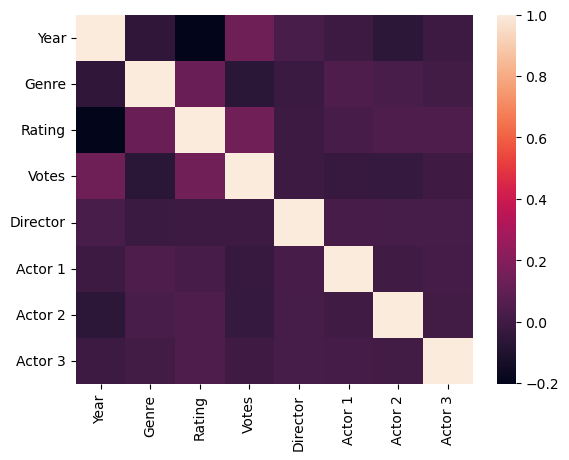

In [35]:
sns.heatmap(Movies_data.corr())

In [36]:
Movies_data.replace([np.inf, -np.inf], np.nan, inplace=True)

<Axes: ylabel='count'>

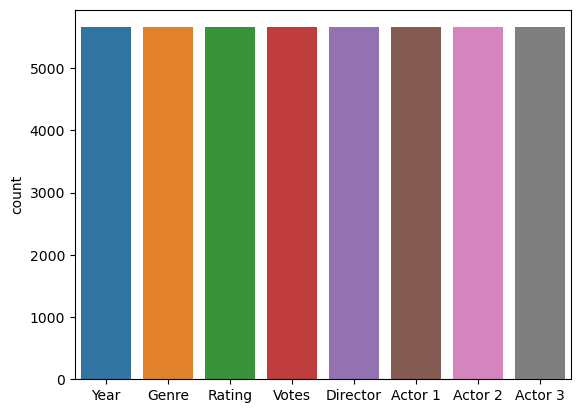

In [37]:
sns.countplot(Movies_data)

In [38]:
X=Movies_data[['Actor 1','Actor 2','Actor 3','Director']]
y=Movies_data['Rating']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = RandomForestClassifier(max_depth=6)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [41]:
scaler=StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [42]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_class = rfc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.02561837455830389


C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
y_pred_class

array([34, 34, 56, ..., 56, 56, 56], dtype=int64)

In [45]:
print(y_test)

10712    42
14052    10
10000    39
3970     24
14334    57
         ..
13713    53
2820     54
1810     34
11150    51
1649     52
Name: Rating, Length: 1132, dtype: int64


In [46]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 251.51943462897526
